##  Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [48]:
df= pd.read_csv("C:/Users\AZADC\Downloads\insurance.csv")

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [52]:
Male = pd.get_dummies(df['sex'], drop_first=True)
df=pd.concat([df, Male], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [53]:
Smoker= pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df, Smoker], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [54]:
df=df.rename(columns= {'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [55]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [56]:
Region= pd.get_dummies(df['region'],drop_first=True)
df=pd.concat([df, Region], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


## Exploratory Analysis

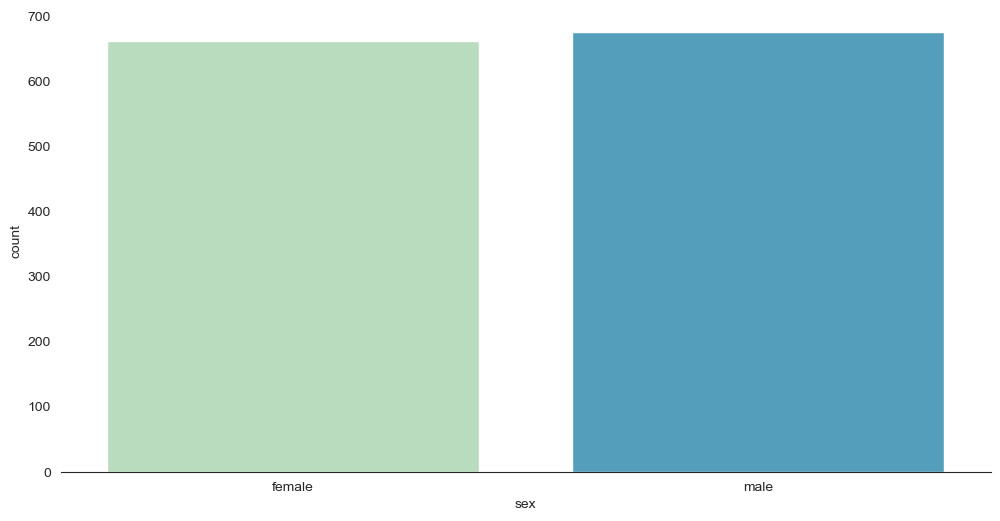

In [57]:
#Distribution of Sex parameter
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='sex', data=df, palette='GnBu')
sns.despine(left=True)

In [58]:
# Relationship of smoker and gender to changes
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='sex', y ='charges' , data=df, palette='GnBu', hue='Smoker')
sns.despine(left=True)

ValueError: Cannot pass values for both `x` and `y`

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='age', ylabel='charges'>

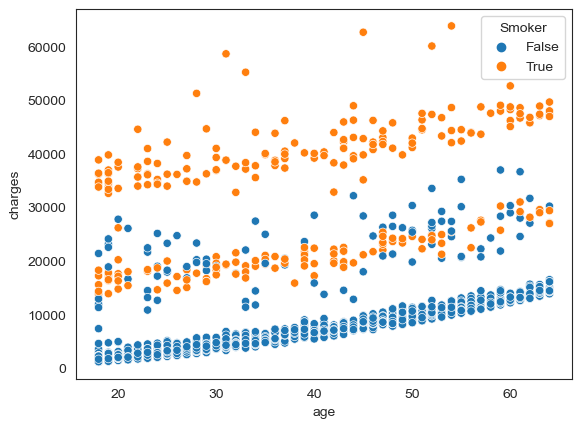

In [60]:
 sns.scatterplot(x='age', y='charges', data=df, hue='Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

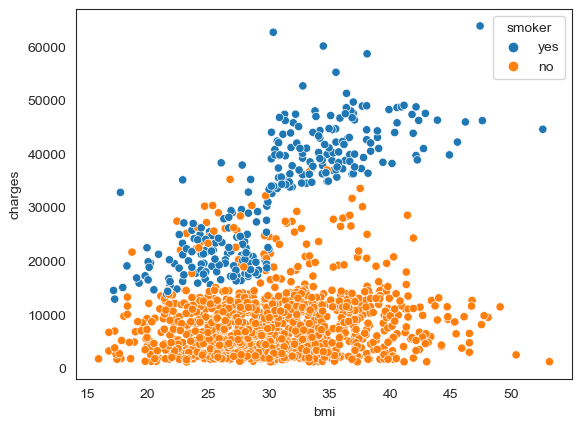

In [61]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')

In [62]:
df.drop(['sex','smoker','region'], axis=1, inplace=True)

In [63]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


<Axes: >

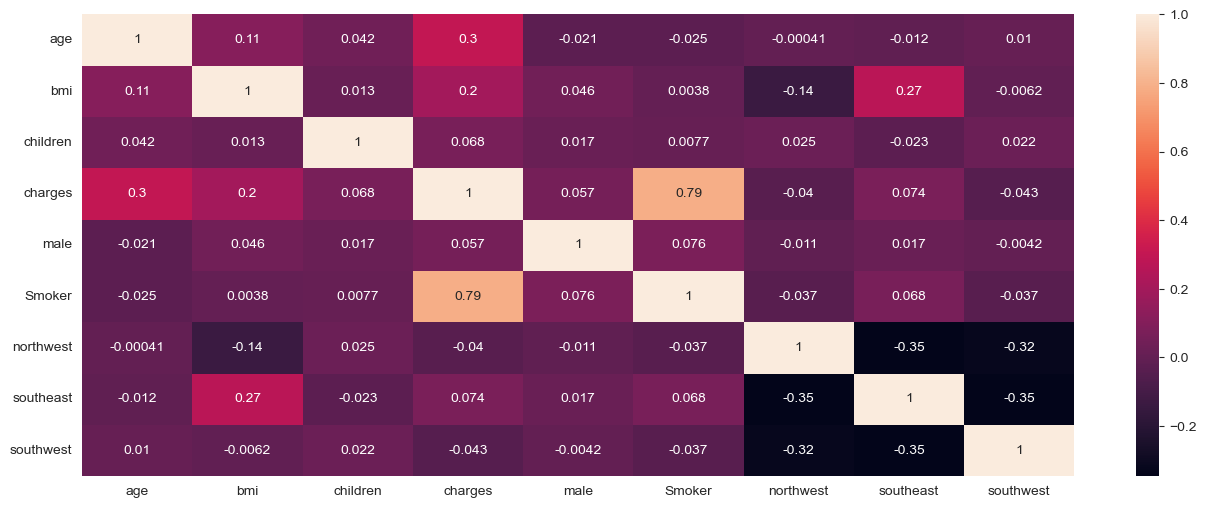

In [64]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

In [65]:
df.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## Splitting the data

In [66]:
x=df.drop('charges', axis=1)
y=df['charges']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [68]:
x_train.shape

(802, 8)

In [69]:
x_test.shape

(536, 8)

In [70]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


##  Scaling the data

In [71]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [77]:
scaled_x_train= scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Support Vector Regression Model

In [78]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [79]:
predict=regressor.predict(scaled_x_test)

In [80]:
predict.shape

(536,)

In [81]:
y_test.shape

(536,)

In [82]:
predict[:10]

array([9603.80017992, 9609.32948653, 9551.38744987, 9530.76766711,
       9606.99878386, 9551.76808137, 9567.60804677, 9590.31007394,
       9571.85027836, 9556.18133049])

In [83]:
y_test[:10]

896     19798.05455
1300    62592.87309
999      5267.81815
579      3206.49135
1030    21677.28345
872      5966.88740
563      9058.73030
904     12644.58900
941      9549.56510
501      6837.36870
Name: charges, dtype: float64